In [3]:
from datascience import *

In [4]:
test = Table()

Pseudo

while there is a man m who is free and hasn't proposed to every woman
    for each m
        let w be the highest ranked woman by m whom he hasn't proposed to
        if w is free
            (m, w) become engaged
        elif w is currently engaged to m'
            if w prefers m' to m
                m remains free
            elif w prefers m to m'
                (m, w) become engaged
                m' becomes free

In [3]:
def in_couple(person, couples):
    for couple in couples:
        if person in couple:
            return False
    return True

def find_man(woman, couples):
    for couple in couples:
        if woman in couple:
            other_man = couple[0]
            return other_man
        
def avg_ranks(couples, men_preferences, women_preferences):
    n = len(couples)
    msum = 0
    wsum = 0
    for couple in couples:
        man = couple[0]
        woman = couple[1]
        man_pref = men_preferences[man].index(woman) + 1
        woman_pref = women_preferences[woman].index(man) + 1
        msum += man_pref
        wsum += woman_pref
    mavg = msum / n
    wavg = wsum / n
    return mavg, wavg

[('m7', 'w27'), ('m10', 'w2'), ('m11', 'w45'), ('m13', 'w59'), ('m17', 'w5'), ('m18', 'w97'), ('m20', 'w54'), ('m24', 'w99'), ('m30', 'w84'), ('m34', 'w53'), ('m35', 'w29'), ('m38', 'w70'), ('m40', 'w14'), ('m44', 'w66'), ('m49', 'w88'), ('m51', 'w77'), ('m52', 'w85'), ('m56', 'w73'), ('m57', 'w82'), ('m62', 'w49'), ('m66', 'w38'), ('m67', 'w63'), ('m72', 'w39'), ('m73', 'w11'), ('m74', 'w46'), ('m75', 'w8'), ('m76', 'w92'), ('m79', 'w48'), ('m81', 'w76'), ('m82', 'w26'), ('m83', 'w72'), ('m87', 'w15'), ('m88', 'w17'), ('m92', 'w37'), ('m94', 'w51'), ('m96', 'w44'), ('m98', 'w68'), ('m99', 'w52'), ('m100', 'w19'), ('m8', 'w89'), ('m21', 'w58'), ('m46', 'w6'), ('m39', 'w12'), ('m19', 'w13'), ('m15', 'w91'), ('m2', 'w81'), ('m14', 'w24'), ('m78', 'w75'), ('m43', 'w21'), ('m91', 'w57'), ('m9', 'w16'), ('m3', 'w47'), ('m4', 'w31'), ('m68', 'w9'), ('m37', 'w79'), ('m90', 'w83'), ('m33', 'w42'), ('m1', 'w23'), ('m16', 'w25'), ('m59', 'w7'), ('m32', 'w50'), ('m29', 'w35'), ('m93', 'w34'), ('m

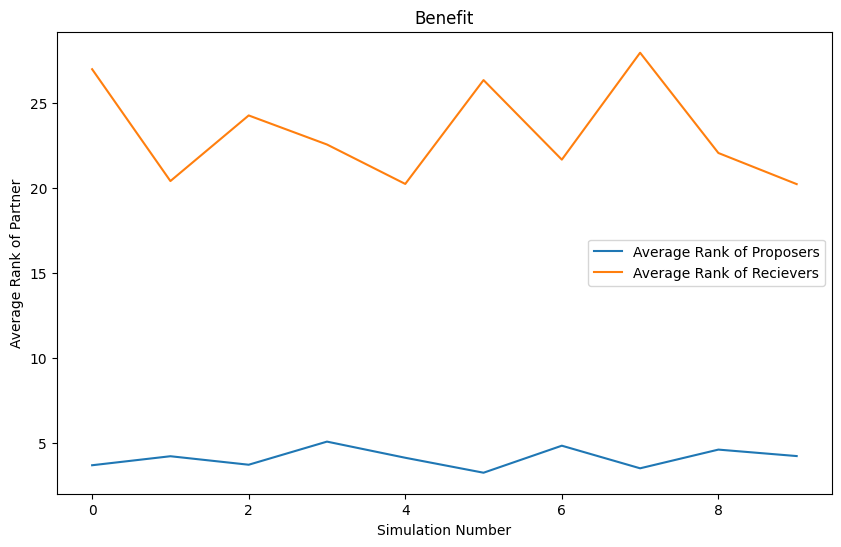

In [36]:
import random
import matplotlib.pyplot as plt

mavgs = []
wavgs = []

def avg_ranks(couples, men_preferences, women_preferences):
    global mavgs
    global wavgs
    n = len(couples)
    msum = 0
    wsum = 0
    for couple in couples:
        man = couple[0]
        woman = couple[1]
        man_pref = men_preferences[man].index(woman) + 1
        woman_pref = women_preferences[woman].index(man) + 1
        msum += man_pref
        wsum += woman_pref
    mavg = msum / n
    wavg = wsum / n
    mavgs.append(mavg)
    wavgs.append(wavg)
    return mavg, wavg

def Stable_Marriage(n):

    #Create lists of men and women

    single_men = []
    single_women = []

    for i in range(n):
        man = f'm{i+1}'
        single_men.append(man)
        woman = f'w{i+1}'
        single_women.append(woman)

    #Create preference lists

    men_preferences = {}
    women_preferences = {}

    for man in single_men:
        men_preferences[man] = random.sample(single_women, n)
    for woman in single_women:
        women_preferences[woman] = random.sample(single_men, n)

    #print(f'Men Preferences - {men_preferences}')
    #print(f'Women Preferences - {women_preferences}')

    #Proposals begin

    couples = []
    #while single men not empty
    #single man proposes until he is engage
    while len(single_men) != 0:

        rank_count = 0
        proposing_man = single_men[0]
        while proposing_man in single_men:
            recieving_woman = men_preferences[proposing_man][rank_count]
            #print(f'{proposing_man} proposes to {recieving_woman}')

            if recieving_woman in single_women: #woman is single
                #print(f'{proposing_man} and {recieving_woman} are engaged')
                couples.append((proposing_man, recieving_woman))
                single_women.remove(recieving_woman)
                single_men.remove(proposing_man)

            else: #woman is previously engaged

                other_man = find_man(recieving_woman, couples)

                recieving_woman_preferences = women_preferences[recieving_woman]
                proposing_man_rank = recieving_woman_preferences.index(proposing_man)
                other_man_rank = recieving_woman_preferences.index(other_man)

                if proposing_man_rank < other_man_rank:
                    #print(f'{recieving_woman} leaves {other_man}')
                    #print(f'{proposing_man} and {recieving_woman} are engaged')
                    couples.append((proposing_man, recieving_woman))
                    couples.remove((other_man, recieving_woman))
                    single_men.append(other_man)
                    single_men.remove(proposing_man)

                #else:
                    #print(f'{recieving_woman} rejects {proposing_man} for {other_man}')
            rank_count += 1

    mavg, wavg = avg_ranks(couples, men_preferences, women_preferences)
    #print(f'Men Avg: {mavg}, Women Avg: {wavg}')

    print(couples)

def multiple_runs(runs, n):
    for i in range(runs):
        Stable_Marriage(n)

multiple_runs(10,100)

plt.figure(figsize=(10,6))
plt.plot(range(10), mavgs, label = 'Average Rank of Proposers')
plt.plot(range(10), wavgs, label = 'Average Rank of Recievers')

plt.xlabel('Simulation Number')
plt.ylabel('Average Rank of Partner')
plt.title('Benefit')
plt.legend()

plt.show()